# Assignment 3 - Building a Custom Visualization

---

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Use the following data for this assignment:

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-52872.532117,160589.585796,-1470.771017,319769.655889,10815.685614,-90432.026648,73937.514908,-47903.875199,-15960.479050,-125132.963350,...,224739.776834,-25730.115526,13969.686745,4268.210690,-281097.704658,377225.653641,-63138.407286,-191246.809417,137519.898008,243348.093129
1993,-146997.689844,10545.129584,129799.558925,-25520.182270,161009.407515,26809.875742,134210.738629,154488.230586,-42459.680504,-82643.013073,...,212964.867246,-139688.279658,162506.363287,44613.022887,3921.259238,77281.975351,78808.103049,101566.505728,-10873.535612,170164.025659
1994,-145142.363173,-109168.255808,172956.650971,-63137.238201,16673.272620,216962.231662,14425.582157,78350.364338,-89484.902270,-233130.833856,...,122905.169064,114590.754707,4968.484886,62295.862491,27972.146670,83715.362318,-191657.298214,80501.984277,23918.750209,-67186.666242
1995,22888.591929,66092.320666,25161.392522,155034.569804,-70285.264770,208508.418831,-30746.475028,25628.773424,98751.271097,-20928.648646,...,25487.583148,2253.661518,-69380.610677,36899.997056,158229.338249,27449.757928,50642.723573,38511.690872,53434.572578,121964.243936


In [2]:
df_mean = pd.DataFrame(df.apply(np.mean, axis=1), columns=['Value Mean'])

In [3]:
df_mean

,Value Mean
1992,27881.399428
1993,43867.438384
1994,37113.933371
1995,48933.044646


In [4]:
df['Standard Error'] =\
df.apply(lambda x: ((x.std()) * 2) / np.sqrt(len(df.columns)))

/opt/conda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


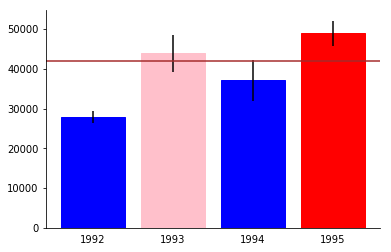

In [5]:
plt.figure()

# bars = df_mean.plot.bar(yerr = df.copy()['Standard Error'])

bars = plt.bar(df_mean.index.values, df_mean.values, yerr = df.copy()['Standard Error'])

plt.xticks([1992,1993,1994,1995])

plt.tick_params(top='off', bottom='off', left='on', right='off', 
                labelleft='on', labelbottom='on')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.legend(loc=2, frameon=False)

def custom_visual(value_of_interest):
    plt.axhline(y=value_of_interest, color='brown', linewidth=1.5)
    for bar, error in [(bar,error) for bar in bars for error in df['Standard Error']]:
        if bar.get_height() - error > value_of_interest:
            bar.set_color('red')
        elif bar.get_height() > value_of_interest:
            bar.set_color('pink')
        elif bar.get_height() + error < value_of_interest:
            bar.set_color('blue')
        else:
            bar.set_color('lightblue')

# user can input any value of interest and if the bar is definitely over the value of interest, it's marked as red
# if the value of the interest is within the confidence interval but the bar is above the value of interest, it's marked pink
# if the value of the interest is within the confidence interval but the bar is below the value of interest, it's marked lightblue
# if the bar is definitely under the value of interest, it's marked as blue

custom_visual(42000)